<a href="https://colab.research.google.com/github/JoysgitHub/AI-COLLAB/blob/main/DECISION_TREE_IRIS_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test set accuracy: 96.67 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


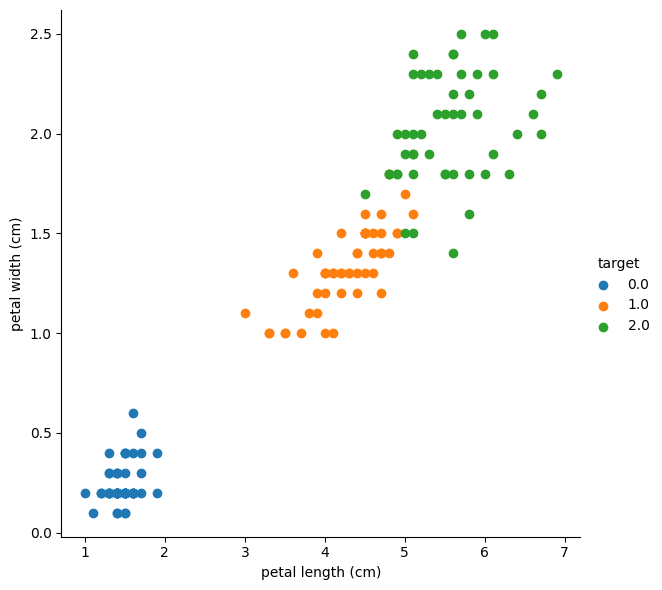

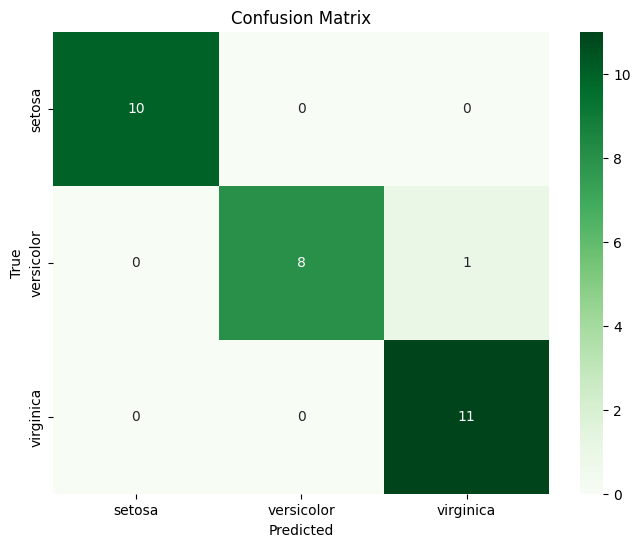

Total Execution Time: 0.67 seconds


In [5]:
import time  # Provides time-related functions
import numpy as np  # Supports large, multi-dimensional arrays and matrices
import pandas as pd  # Offers data structures and operations for manipulating numerical tables
import matplotlib.pyplot as plt  # Allows for creating static, interactive, and animated visualizations
import seaborn as sns  # Provides a high-level interface for drawing attractive statistical graphics
from sklearn import datasets  # Includes utilities to load datasets
from sklearn.tree import DecisionTreeClassifier  # Implements a decision tree classifier
from sklearn import metrics  # Includes performance metrics for evaluation
import warnings  # Allows for control over warning messages
from sklearn.model_selection import train_test_split  # Splits data into random train and test subsets

warnings.filterwarnings('ignore')  # Ignore warnings shown during code execution.

# Record the start time
start_time = time.time()

# Load the iris dataset into iris variable
iris = datasets.load_iris()

# Convert data to pandas dataframe
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])


# Create a scatter plot graph using Seaborn's FacetGrid function
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)


# Initialize a DecisionTreeClassifier object with specific parameters
model = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Train the decision tree classifier on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
test_accuracy = model.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy*100:.2f} %")

# Make predictions on the test set
predicted_test = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_test))

# Calculate and print the confusion matrix for the test set
conf_matrix_test = metrics.confusion_matrix(y_test, predicted_test)
print(conf_matrix_test)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Record the end time
end_time = time.time()

# Calculate the total execution time
execution_time = end_time - start_time
print("Total Execution Time: {:.2f} seconds".format(execution_time))
